# Amazon Alexa Review - Sentiment Analysis

Analyzing the Amazon Alexa dataset and building classification models to predict if the sentiment of a given input sentence is positive or negative.

# Importing required libraries

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Downloading stopwords from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


# Scikit-learn imports for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import spacy
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report


# WordCloud library for visualizing word frequencies
from wordcloud import WordCloud


# Importing other classification models
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Pickle for saving the model
import pickle

# Regular expressions for text preprocessing
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aisha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 1 Load the Data

In [2]:
#Load the data

data = pd.read_csv(r"C:\DATAIOD\amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [3]:
# Check the shape of the data

print("Shape of the dataset:", data.shape)

Shape of the dataset: (3150, 5)


In [4]:
# Display the first few rows of the dataset

print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


There is one record with no 'verified_reviews' (null value)

In [6]:
#Getting the record where 'verified_reviews' is null 

data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [7]:
#We will drop the null record

data.dropna(inplace=True)

In [8]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [9]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [10]:
# Display the first few rows to check the new column
print("First few rows of the dataset with 'length' column:")
data.head()

First few rows of the dataset with 'length' column:


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


The 'length' column is new generated column - stores the length of 'verified_reviews' for that record. Let's check for some sample records

In [11]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


We can see that the length of review is the same as the value in the length column for that record

Datatypes of the features

In [12]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

- rating, feedback and length are integer values
- date, variation and verified_reviews are string values

# 2. EDA

# Analyzing 'rating' column

This column refers to the rating of the variation given by the user

In [13]:
len(data)

3149

In [14]:
#Distinct values of 'rating' and its count  

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


Let's plot the above values in a bar graph

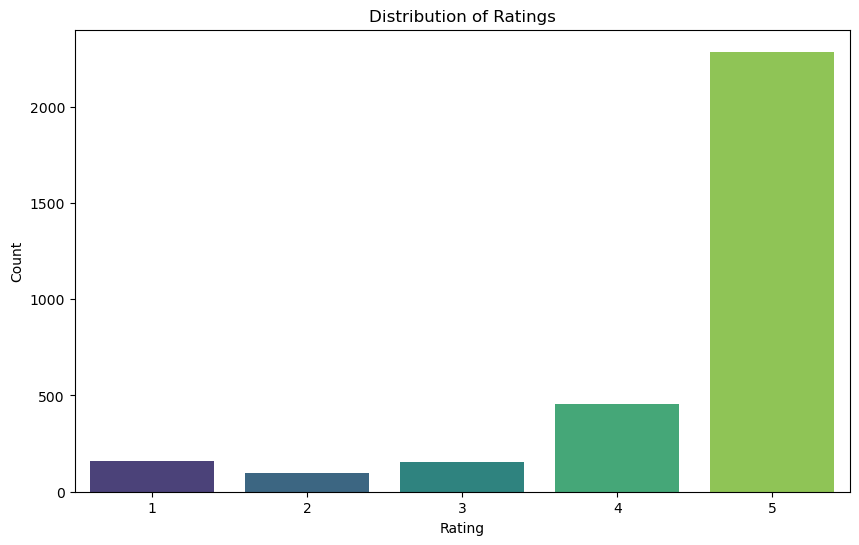

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=data, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# save plot
plt.savefig('C:/DATAIOD/DistributionofRatings.png')

In [16]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


Let's plot the above values in a pie chart

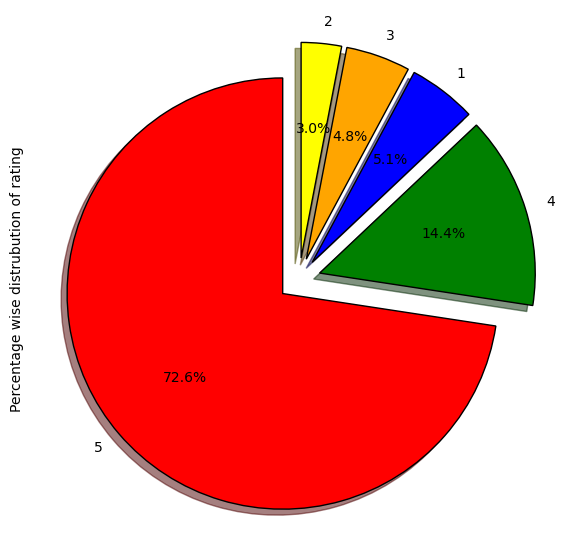

In [17]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

# save plot
plt.savefig('C:/DATAIOD/Percentage wise distrubution of rating.png')

# Analyzing 'feedback' column

This column refers to the feedback of the verified review

In [18]:
#Distinct values of 'feedback' and its count 

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


here are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.

feedback value = 0

In [19]:
#Extracting the 'verified_reviews' value for two record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

print( )
print( )


review_0 = data[data['feedback'] == 0].iloc[3]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


"Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?"


In [20]:
#Extracting the 'verified_reviews' value for two record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

print( )
print( )

review_1 = data[data['feedback'] == 1].iloc[3]['verified_reviews']
print(review_1)



Loved it!


"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."


From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review

In [21]:
# Analyze the relationship between rating and feedback
rating_feedback = pd.crosstab(data['rating'], data['feedback'])
print("\nCrosstab of 'rating' and 'feedback':")
print(rating_feedback)


Crosstab of 'rating' and 'feedback':
feedback    0     1
rating             
1         161     0
2          95     0
3           0   152
4           0   455
5           0  2286


Let's Plot the relationship between rating and feedback

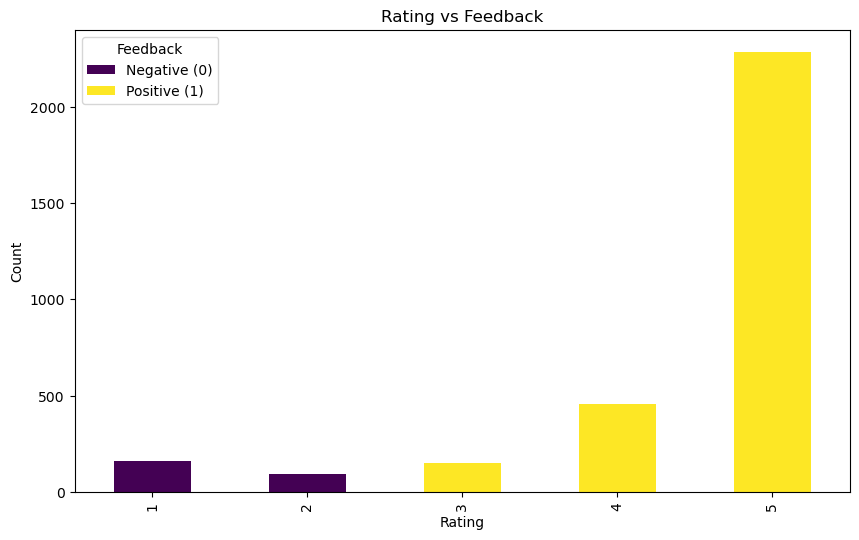

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot the relationship between rating and feedback
rating_feedback.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Rating vs Feedback')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Feedback', loc='upper left', labels=['Negative (0)', 'Positive (1)'])
plt.show()

# save plot
plt.savefig('C:/DATAIOD/Rating vs Feedback.png')

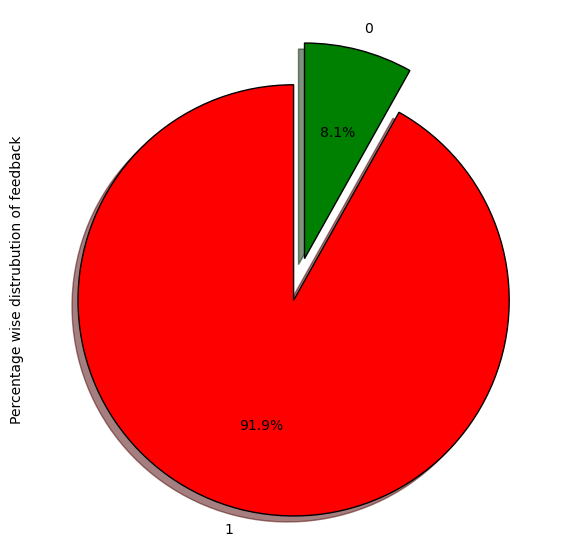

In [23]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

# save plot
plt.savefig('C:/DATAIOD/Percentage wise distrubution of feedback.png')

Feedback distribution

- 91.87% reviews are positive
- 8.13% reviews are negative

Let's see the 'rating' values for different values of 'feedback'

In [24]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [25]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

# Analyzing 'variation' column

This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [26]:
#Distinct values of 'variation' and its count 

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


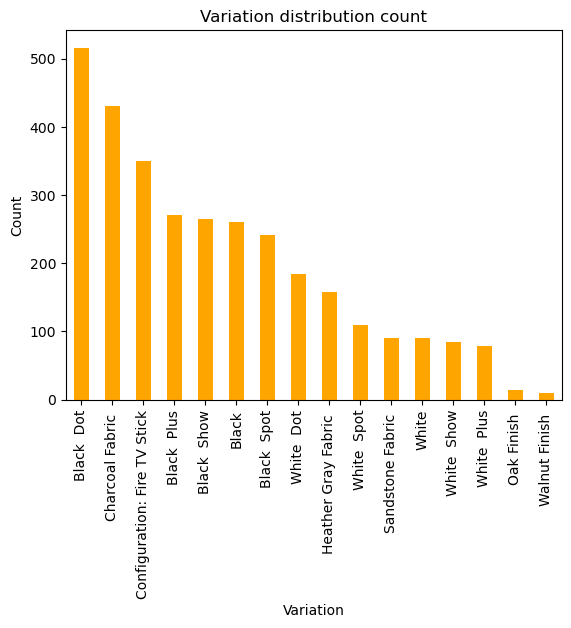

<Figure size 640x480 with 0 Axes>

In [27]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

# save plot
plt.savefig('C:/DATAIOD/Variation distribution count.png')

In [28]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


Mean rating according to variation

In [29]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

Let's analyze the above ratings

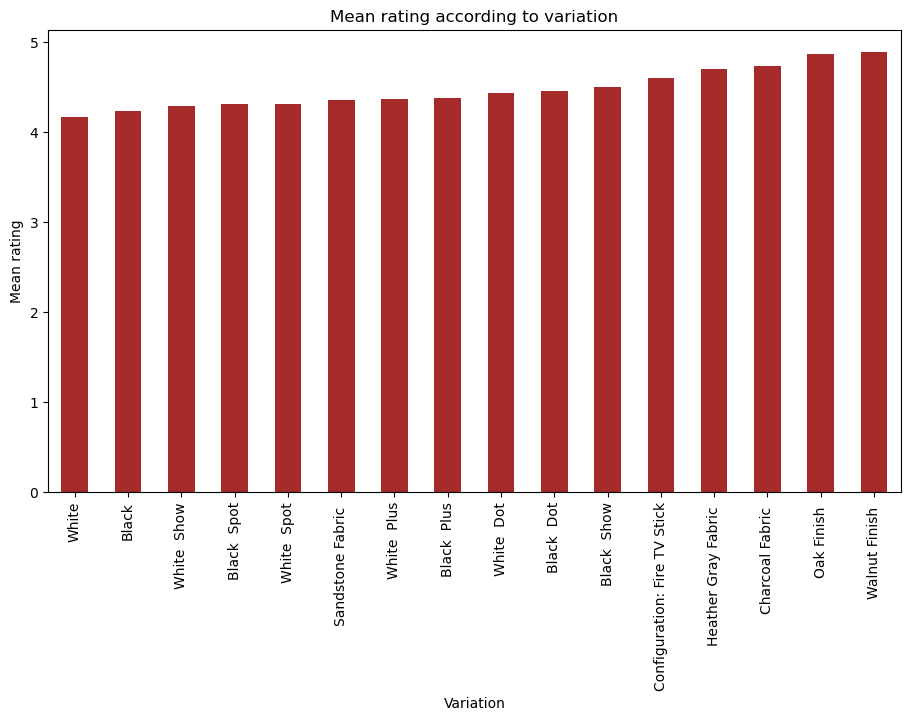

<Figure size 640x480 with 0 Axes>

In [30]:
# Calculate mean rating for each variation and plot

data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

# save plot
plt.savefig('C:/DATAIOD/Mean rating according to variation.png')

# Analyzing 'verified_reviews' column

This column contains the textual review given by the user for a variation for the product.

In [31]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

Length analysis for full dataset

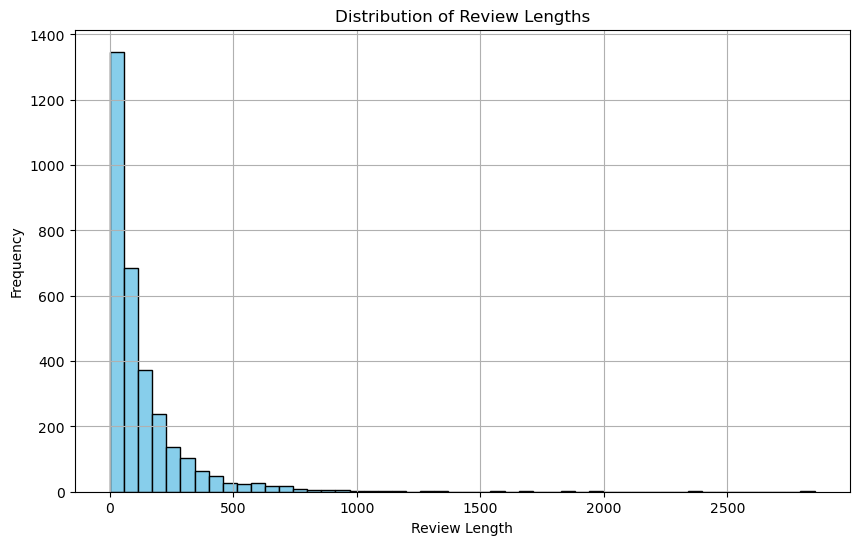

In [32]:
# Plotting histogram of review lengths
plt.figure(figsize=(10, 6))
plt.hist(data['length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Length analysis when feedback is 0 (negative)

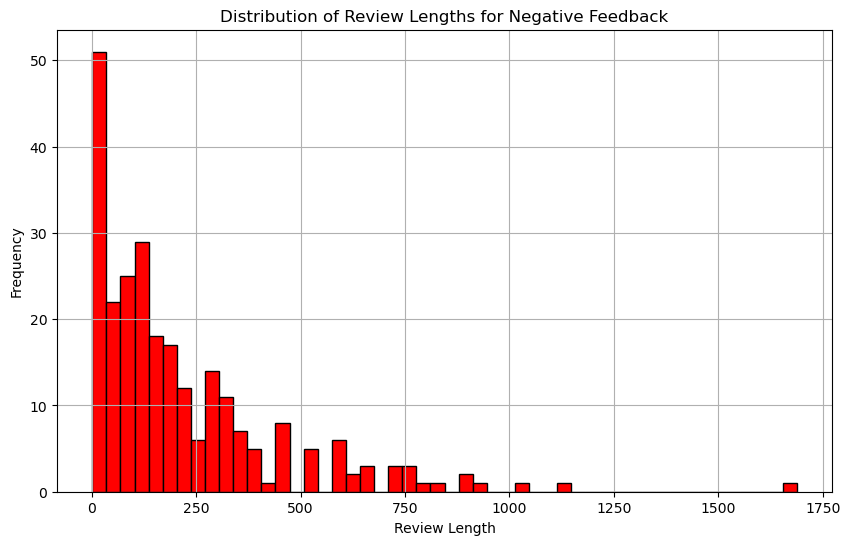

In [33]:
#sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')


import matplotlib.pyplot as plt

# Filter data for reviews with feedback = 0 (negative)
negative_reviews = data[data['feedback'] == 0]

# Plotting histogram of review lengths for negative feedback
plt.figure(figsize=(10, 6))
plt.hist(negative_reviews['length'], bins=50, color='red', edgecolor='black')
plt.title('Distribution of Review Lengths for Negative Feedback')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Length analysis when feedback is 1 (positive)

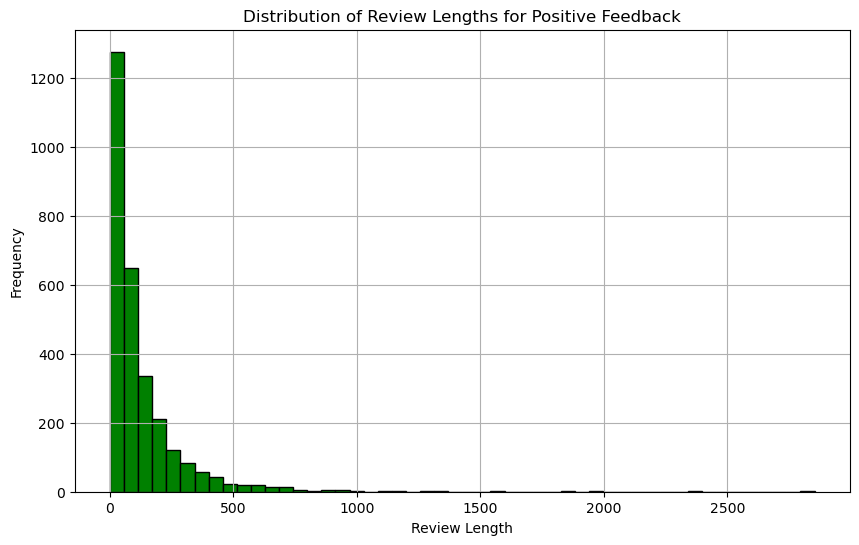

In [34]:
#sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')


# Filter data for reviews with feedback = 1 (positive)
positive_reviews = data[data['feedback'] == 1]

# Plotting histogram of review lengths for positive feedback
plt.figure(figsize=(10, 6))
plt.hist(positive_reviews['length'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Review Lengths for Positive Feedback')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




Lengthwise mean rating

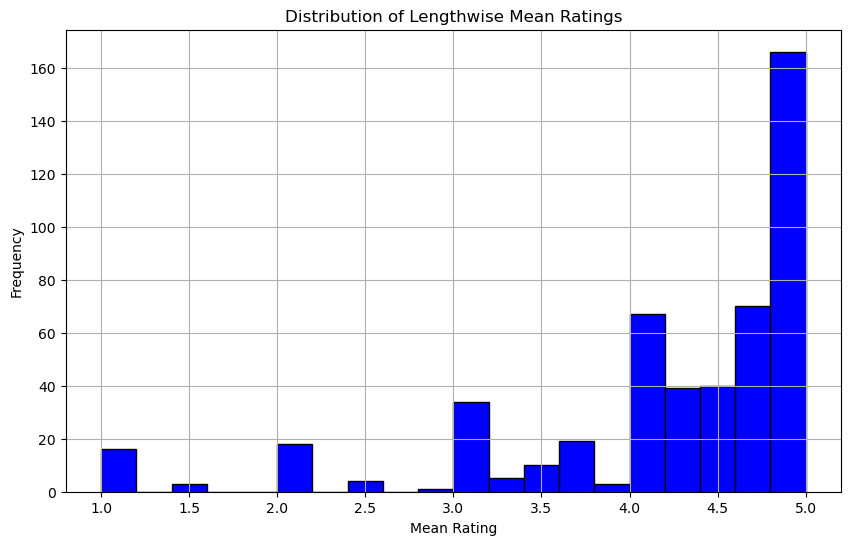

In [35]:
import matplotlib.pyplot as plt

# Calculate mean rating for each review length
mean_rating_by_length = data.groupby('length')['rating'].mean()

# Plotting histogram of lengthwise mean ratings
plt.figure(figsize=(10, 6))
plt.hist(mean_rating_by_length, color='blue', bins=20, edgecolor='black')
plt.title('Distribution of Lengthwise Mean Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [36]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

In [37]:
words.shape

(3149, 3784)

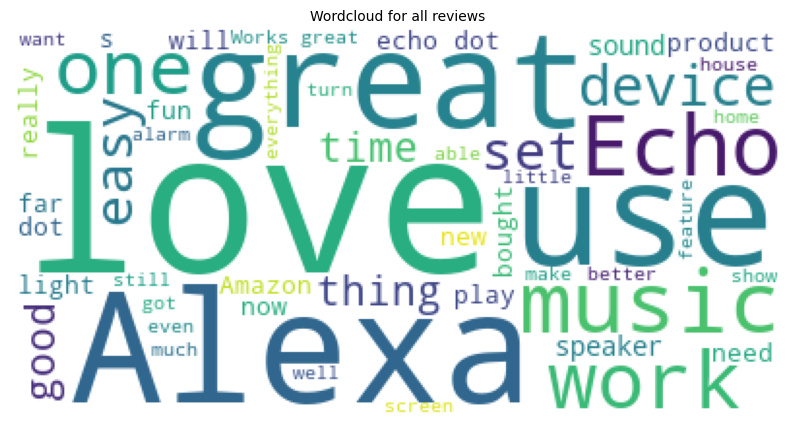

<Figure size 640x480 with 0 Axes>

In [38]:
# Combine all reviews into a single string
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

# save plot
plt.savefig('C:/DATAIOD/Wordcloud for all reviews.png')

Lets find the unique words in each feedback category

In [39]:
# Combine all reviews for negative feedback category and split into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

# Combine all reviews for positive feedback category and split into individual words
pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

# Finding words from negative reviews that are not in positive reviews
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

# Finding words from positive reviews that are not in negative reviews
unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

Wordcloud for negative reviews

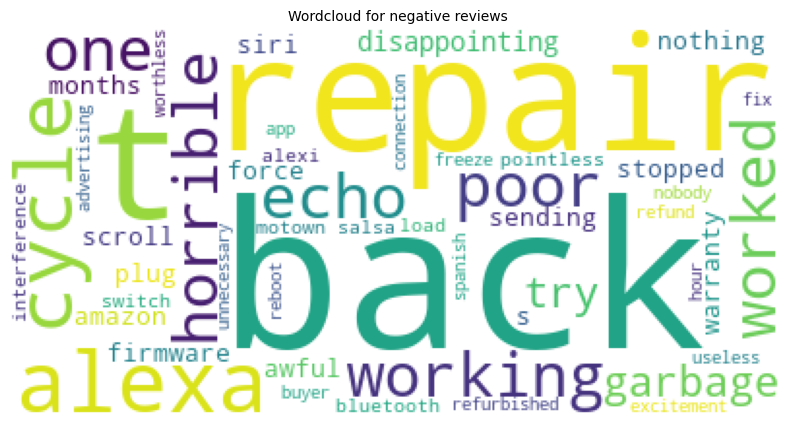

<Figure size 640x480 with 0 Axes>

In [40]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

# save plot
plt.savefig('C:/DATAIOD/Wordcloud for negative reviews.png')

Negative words can be seen in the above word cloud - garbage, pointless, poor, horrible, repair etc

Wordcloud for positive reviews

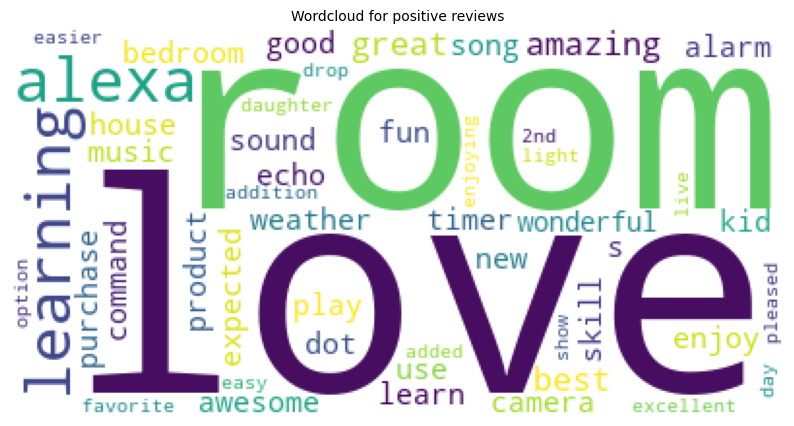

<Figure size 640x480 with 0 Axes>

In [41]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

# save plot
plt.savefig('C:/DATAIOD/Wordcloud for positive reviews.png')

Positive words can be seen in the above word cloud - good, enjoying, amazing, best, great etc

# 3. Preprocessing and Modelling

In [42]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Remove non-alphanumeric characters and multiple spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    
    # Tokenization
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove stopwords and stem each word
    stopwords_list = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_list]
    
    return ' '.join(tokens)

In [43]:
# Apply text preprocessing to 'verified_reviews'
data['cleaned_reviews'] = data['verified_reviews'].apply(preprocess_text)

In [44]:
# Feature Engineering
data['review_length'] = data['verified_reviews'].apply(len)  # Length of reviews
data['word_count'] = data['verified_reviews'].apply(lambda x: len(str(x).split()))  # Word count in reviews

In [45]:
# Part-of-Speech (POS) tagging using NLTK
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

In [46]:
data['pos_tags'] = data['verified_reviews'].apply(pos_tagging)


In [47]:
# Vectorization using CountVectorizer and TF-IDF
cv = CountVectorizer(max_features=5000)
tfidf = TfidfVectorizer(max_features=5000)

X_cv = cv.fit_transform(data['cleaned_reviews']).toarray()
X_tfidf = tfidf.fit_transform(data['cleaned_reviews']).toarray()

y = data['feedback']

In [48]:
# Splitting the data into train and test sets
X_train_cv, X_test_cv, y_train, y_test = train_test_split(X_cv, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [49]:
# Define models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

In [50]:
# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return accuracy, precision, recall

In [51]:
# Train and evaluate models
rf_accuracy_train, rf_precision_train, rf_recall_train = train_and_evaluate_model(rf_model, X_train_tfidf, X_train_tfidf, y_train, y_train)
rf_accuracy_test, rf_precision_test, rf_recall_test = train_and_evaluate_model(rf_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

xgb_accuracy_train, xgb_precision_train, xgb_recall_train = train_and_evaluate_model(xgb_model, X_train_tfidf, X_train_tfidf, y_train, y_train)
xgb_accuracy_test, xgb_precision_test, xgb_recall_test = train_and_evaluate_model(xgb_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [52]:
# Prepare data for plotting
models = ['Random Forest (Train)', 'Random Forest (Test)', 'XGBoost (Train)', 'XGBoost (Test)']
accuracy_scores = [rf_accuracy_train, rf_accuracy_test, xgb_accuracy_train, xgb_accuracy_test]
precision_scores = [rf_precision_train, rf_precision_test, xgb_precision_train, xgb_precision_test]
recall_scores = [rf_recall_train, rf_recall_test, xgb_recall_train, xgb_recall_test]

x = np.arange(len(models))
width = 0.25

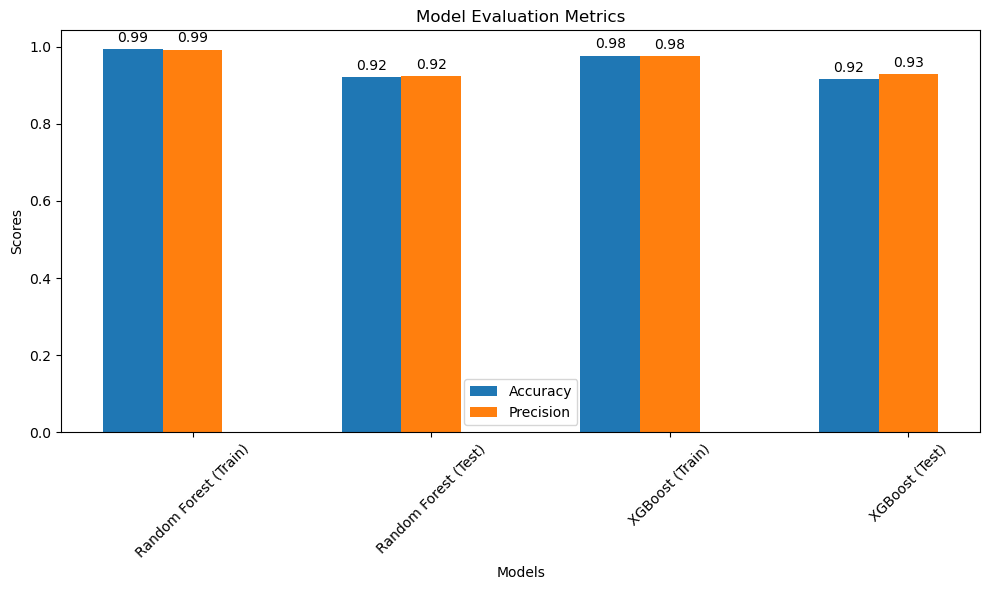

<Figure size 640x480 with 0 Axes>

In [53]:
# Plotting accuracy, precision, and recall
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x, precision_scores, width, label='Precision')


# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Add value labels on top of bars
def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(rects1)
add_value_labels(rects2)


fig.tight_layout()

plt.show()

# save plot
plt.savefig('C:/DATAIOD/ModelEvaluationMetrics.png')

In [54]:
# Print accuracy, precision, and recall values for training and testing datasets
print("Random Forest Classifier:")
print("Train - Accuracy:", rf_accuracy_train, "Precision:", rf_precision_train, "Recall:", rf_recall_train)
print("Test  - Accuracy:", rf_accuracy_test, "Precision:", rf_precision_test, "Recall:", rf_recall_test)

print("\nXGBoost Classifier:")
print("Train - Accuracy:", xgb_accuracy_train, "Precision:", xgb_precision_train, "Recall:", xgb_recall_train)
print("Test  - Accuracy:", xgb_accuracy_test, "Precision:", xgb_precision_test, "Recall:", xgb_recall_test)

Random Forest Classifier:
Train - Accuracy: 0.9932512901945216 Precision: 0.9927443448570209 Recall: 1.0
Test  - Accuracy: 0.9222222222222223 Precision: 0.923202614379085 Recall: 0.9964726631393298

XGBoost Classifier:
Train - Accuracy: 0.9773719730051608 Precision: 0.9764804703905922 Recall: 0.9995700773860705
Test  - Accuracy: 0.9158730158730158 Precision: 0.9283333333333333 Recall: 0.982363315696649


In [55]:


from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
rf_grid_search.fit(X_train_tfidf, y_train)

# Best parameters and best score
print("Best parameters for Random Forest: ", rf_grid_search.best_params_)
print("Best accuracy for Random Forest: ", rf_grid_search.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\aisha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    valida

Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Best accuracy for Random Forest:  0.9329104943526875


In [56]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Perform Grid Search
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
xgb_grid_search.fit(X_train_tfidf, y_train)

# Best parameters and best score
print("Best parameters for XGBoost: ", xgb_grid_search.best_params_)
print("Best accuracy for XGBoost: ", xgb_grid_search.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for XGBoost:  {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best accuracy for XGBoost:  0.9333068467752615


In [57]:
# Re-train the Random Forest model with best parameters
best_rf_model = rf_grid_search.best_estimator_
best_rf_model.fit(X_train_tfidf, y_train)
rf_y_pred_train = best_rf_model.predict(X_train_tfidf)
rf_y_pred_test = best_rf_model.predict(X_test_tfidf)

# Calculate metrics for Random Forest
rf_train_accuracy = accuracy_score(y_train, rf_y_pred_train)
rf_train_precision = precision_score(y_train, rf_y_pred_train)
rf_train_recall = recall_score(y_train, rf_y_pred_train)
rf_test_accuracy = accuracy_score(y_test, rf_y_pred_test)
rf_test_precision = precision_score(y_test, rf_y_pred_test)
rf_test_recall = recall_score(y_test, rf_y_pred_test)

# Re-train the XGBoost model with best parameters
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_model.fit(X_train_tfidf, y_train)
xgb_y_pred_train = best_xgb_model.predict(X_train_tfidf)
xgb_y_pred_test = best_xgb_model.predict(X_test_tfidf)

# Calculate metrics for XGBoost
xgb_train_accuracy = accuracy_score(y_train, xgb_y_pred_train)
xgb_train_precision = precision_score(y_train, xgb_y_pred_train)
xgb_train_recall = recall_score(y_train, xgb_y_pred_train)
xgb_test_accuracy = accuracy_score(y_test, xgb_y_pred_test)
xgb_test_precision = precision_score(y_test, xgb_y_pred_test)
xgb_test_recall = recall_score(y_test, xgb_y_pred_test)

# Print the evaluation metrics for both models
print("Random Forest Classifier (after hyperparameter tuning):")
print("Train - Accuracy:", rf_train_accuracy, "Precision:", rf_train_precision, "Recall:", rf_train_recall)
print("Test  - Accuracy:", rf_test_accuracy, "Precision:", rf_test_precision, "Recall:", rf_test_recall)

print("\nXGBoost Classifier (after hyperparameter tuning):")
print("Train - Accuracy:", xgb_train_accuracy, "Precision:", xgb_train_precision, "Recall:", xgb_train_recall)
print("Test  - Accuracy:", xgb_test_accuracy, "Precision:", xgb_test_precision, "Recall:", xgb_test_recall)


Random Forest Classifier (after hyperparameter tuning):
Train - Accuracy: 0.9932512901945216 Precision: 0.9927443448570209 Recall: 1.0
Test  - Accuracy: 0.9222222222222223 Precision: 0.923202614379085 Recall: 0.9964726631393298

XGBoost Classifier (after hyperparameter tuning):
Train - Accuracy: 0.9714172290591505 Precision: 0.9699749791492911 Recall: 1.0
Test  - Accuracy: 0.9174603174603174 Precision: 0.9256198347107438 Recall: 0.9876543209876543
